In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ## World Map

In [171]:
df=pd.read_csv("medical home.csv")
df.head()

,date,population
0,19-01-2022,10
1,02-02-2022,6
2,22-04-2022,7
3,21-06-2022,11
4,01-09-2022,9


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        9 non-null      object
 1   population  9 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 272.0+ bytes


In [173]:
df.isnull().sum()

date          0
population    0
dtype: int64

In [174]:
df["date"]= pd.to_datetime(df["date"])

<ipython-input-174-082167ba8dcc>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["date"]= pd.to_datetime(df["date"])


In [175]:
 !pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [176]:
 from prophet import Prophet

In [177]:
population=df.groupby('date')['population'].sum().reset_index()

In [178]:
population.rename(columns={"date":"ds","population":"y"},inplace=True)

In [179]:
model=Prophet(interval_width=0.95)

In [180]:
model.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/en61jzf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/ceg4mblt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96415', 'data', 'file=/tmp/tmpqki2d_87/en61jzf2.json', 'init=/tmp/tmpqki2d_87/ceg4mblt.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelu_gm9y3u/prophet_model-20230421063323.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:33:23 - cmdstanpy - INFO - Chain [1] start processing
INF

In [181]:
future_dates=model.make_future_dataframe(periods=30)

In [182]:
forecast=model.predict(future_dates)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-09   8.241398    5.388906   11.119265     8.241398     8.241398   
1  2022-01-19   8.282459    5.287461   11.323065     8.282459     8.282459   
2  2022-02-02   8.339943    5.622501   11.296086     8.339943     8.339943   
3  2022-04-22   8.664321    5.725114   11.444305     8.664321     8.664321   
4  2022-06-21   8.910685    6.240219   11.863136     8.910685     8.910685   
5  2022-09-11   9.247381    6.361698   12.393839     9.247381     9.247381   
6  2022-09-29   9.321290    6.491009   11.944538     9.321290     9.321290   
7  2022-12-19   9.653880    6.729711   12.645803     9.653880     9.653880   
8  2023-06-01  10.327273    7.481713   13.214293    10.327273    10.327273   
9  2023-06-02  10.331379    7.362446   13.224040    10.331379    10.331379   
10 2023-06-03  10.335485    7.445528   13.394804    10.335485    10.335485   
11 2023-06-04  10.339591    7.543633   13.151615    10.339591   

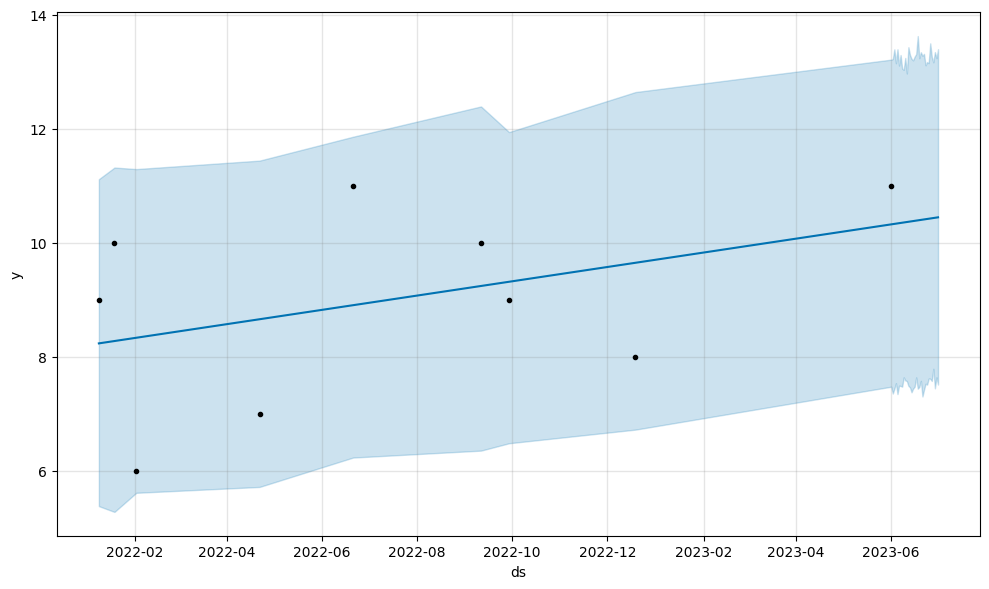

In [183]:
model.plot(forecast)
print(forecast)

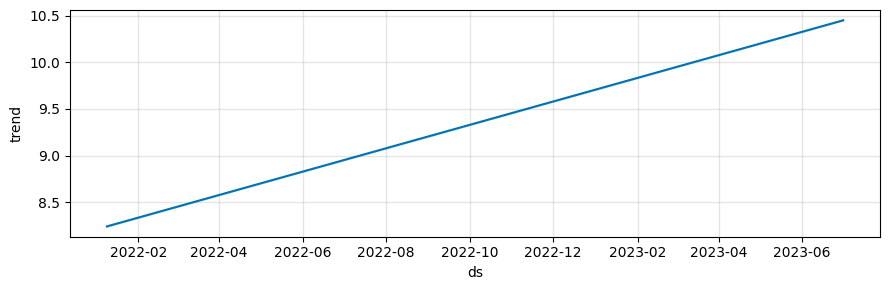

In [184]:
component=model.plot_components(forecast)

In [185]:
 model1=Prophet(interval_width=0.95)

In [186]:
 model1.fit(population)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/d_mmhw_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqki2d_87/ui4v8gf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55738', 'data', 'file=/tmp/tmpqki2d_87/d_mmhw_5.json', 'init=/tmp/tmpqki2d_87/ui4v8gf5.json', 'output', 'file=/tmp/tmpqki2d_87/prophet_modelh1k2ur3l/prophet_model-20230421063408.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:34:08 - cmdstanpy - INFO - Chain [1] start processing
INF

In [187]:
future_dates=model1.make_future_dataframe(periods=10)

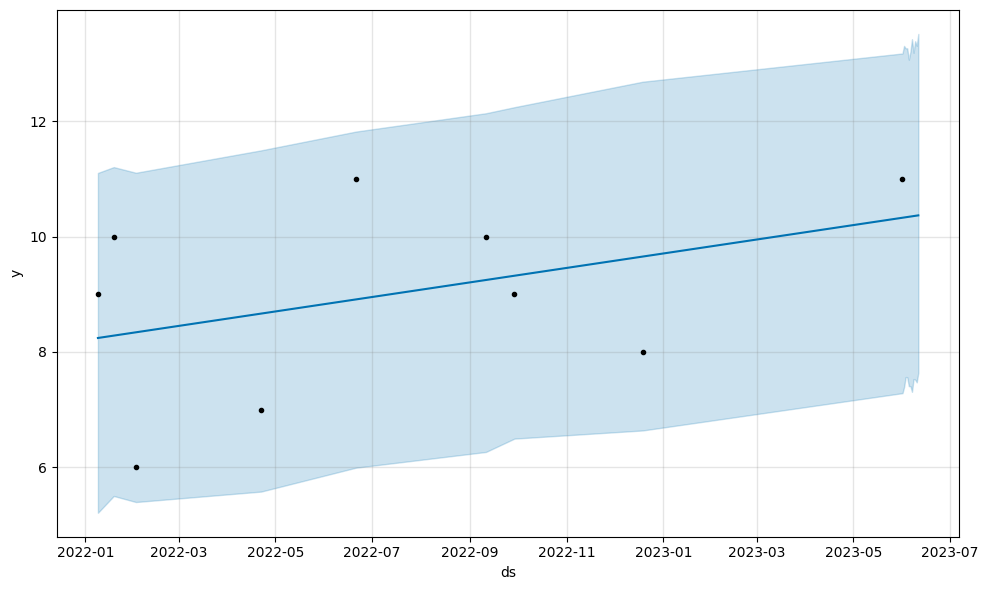

In [188]:
forecasting=model.predict(future_dates)
ploting=model.plot(forecasting)

           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2022-01-09   8.241398    5.209301   11.104578     8.241398     8.241398   
1  2022-01-19   8.282459    5.500465   11.205656     8.282459     8.282459   
2  2022-02-02   8.339943    5.395721   11.107665     8.339943     8.339943   
3  2022-04-22   8.664321    5.576724   11.496007     8.664321     8.664321   
4  2022-06-21   8.910685    5.991998   11.822342     8.910685     8.910685   
5  2022-09-11   9.247381    6.264262   12.139751     9.247381     9.247381   
6  2022-09-29   9.321290    6.495893   12.245158     9.321290     9.321290   
7  2022-12-19   9.653880    6.637352   12.687039     9.653880     9.653880   
8  2023-06-01  10.327273    7.284495   13.176912    10.327273    10.327273   
9  2023-06-02  10.331379    7.388974   13.307836    10.331379    10.331379   
10 2023-06-03  10.335485    7.563500   13.266362    10.335485    10.335485   
11 2023-06-04  10.339591    7.560669   13.266209    10.339591   

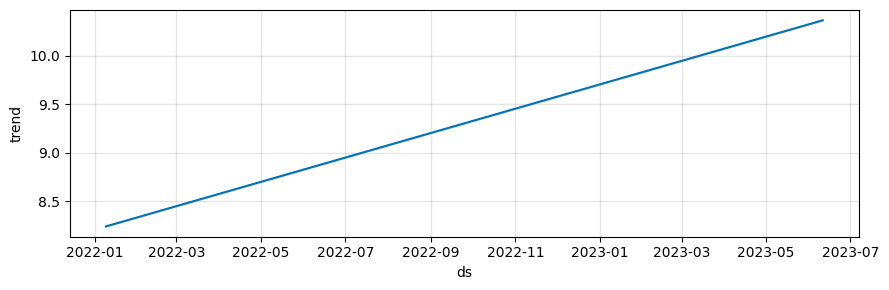

In [189]:
week=model1.plot_components(forecasting)
print(forecasting)